In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
# Features
X = df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
        'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
# Target
y = df['Class']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#feature selection
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the model (Logistic Regression or Random Forest)
model = LogisticRegression()
# OR
# model = RandomForestClassifier(random_state=42)

# Apply RFE with the estimator
rfe = RFE(estimator=model, n_features_to_select=10)  # Choose how many features to select
X_rfe = df.drop(columns=['Class'], axis=1)
y = df['Class']

rfe.fit_transform(X_rfe, y)

# Create a list of features with their ranking and selection status
features = [(col, rfe.support_[i], rfe.ranking_[i]) for i, col in zip(range(X_rfe.shape[1]), X_rfe.columns)]

# Sort the features by ranking
features_sorted_by_rank = sorted(features, key=lambda x: x[2])

# Print the features sorted by rank
for feature in features_sorted_by_rank:
    print(f"Feature: {feature[0]} selected: {feature[1]} rank={feature[2]}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Feature: V4 selected: True rank=1
Feature: V8 selected: True rank=1
Feature: V9 selected: True rank=1
Feature: V10 selected: True rank=1
Feature: V13 selected: True rank=1
Feature: V14 selected: True rank=1
Feature: V16 selected: True rank=1
Feature: V21 selected: True rank=1
Feature: V22 selected: True rank=1
Feature: V27 selected: True rank=1
Feature: V25 selected: False rank=2
Feature: V20 selected: False rank=3
Feature: V6 selected: False rank=4
Feature: V15 selected: False rank=5
Feature: V23 selected: False rank=6
Feature: V28 selected: False rank=7
Feature: V5 selected: False rank=8
Feature: V7 selected: False rank=9
Feature: V19 selected: False rank=10
Feature: V12 selected: False rank=11
Feature: V18 selected: False rank=12
Feature: V11 selected: False rank=13
Feature: V3 selected: False rank=14
Feature: V26 selected: False rank=15
Feature: V17 selected: False rank=16
Feature: V1 selected: False rank=17
Feature: V2 selected: False rank=18
Feature: Amount selected: False rank=1

   Feature       F-Score
17     V17  33979.168593
14     V14  28695.547788
12     V12  20749.822361
10     V10  14057.979985
16     V16  11443.349428
3       V3  11014.508305
7       V7  10349.605408
11     V11   6999.355047
4       V4   5163.832114
18     V18   3584.380605


<ipython-input-7-fed801902c47>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F-Score', y='Feature', data=anova_df.head(100), palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grou

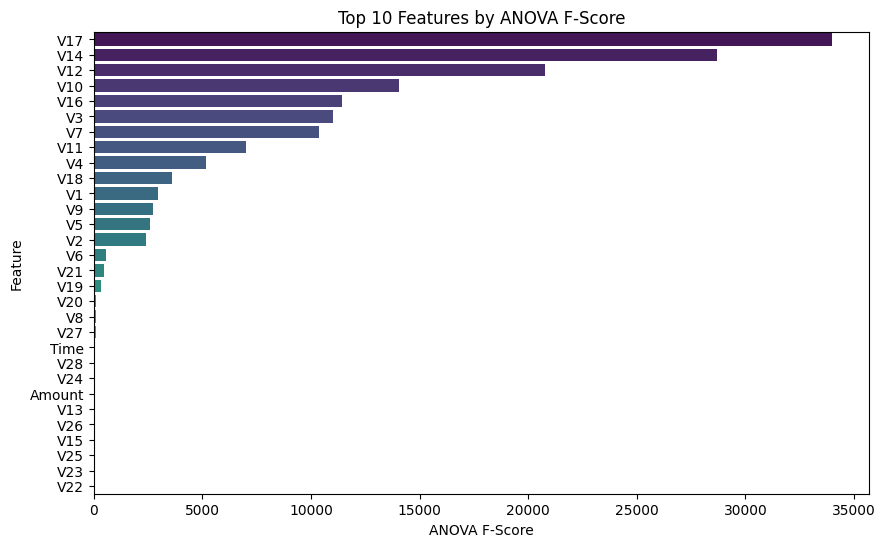

In [ ]:
#Anova(filter)

from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X is your feature matrix and y is the target (Class column)
# Here we select the top 10 features based on ANOVA F-score
k_best = SelectKBest(score_func=f_classif, k=10)
X_selected = k_best.fit_transform(X, y)

# Get the scores for each feature
anova_scores = k_best.scores_

# Create a DataFrame to map feature names to their scores
feature_names = X.columns
anova_df = pd.DataFrame({'Feature': feature_names, 'F-Score': anova_scores})

# Sort the features by their ANOVA F-score in descending order
anova_df = anova_df.sort_values(by='F-Score', ascending=False)

# Display the top selected features based on ANOVA F-Score
print(anova_df.head(10))  # Top 10 features
# Plot the ANOVA F-scores for the top features
plt.figure(figsize=(10, 6))
sns.barplot(x='F-Score', y='Feature', data=anova_df.head(100), palette='viridis')
plt.title('Top 10 Features by ANOVA F-Score')
plt.xlabel('ANOVA F-Score')
plt.ylabel('Feature')
plt.show()


   Feature  Coefficient
0     Time    -0.000194
1       V1    -0.003799
2       V2     0.004658
3       V3    -0.007735
4       V4     0.005348
5       V5    -0.003261
6       V6    -0.002172
7       V7    -0.008407
8       V8     0.000979
9       V9    -0.003977
10     V10    -0.008823
11     V11     0.006373
12     V12    -0.010772
13     V13    -0.000201
14     V14    -0.012629
15     V15    -0.000196
16     V16    -0.008143
17     V17    -0.013574
18     V18    -0.004661
19     V19     0.001533
20     V20     0.000253
21     V21     0.001502
22     V22     0.000159
23     V23     0.000075
24     V24    -0.000302
25     V25     0.000161
26     V26     0.000172
27     V27     0.000671
28     V28     0.000367
29  Amount     0.001655


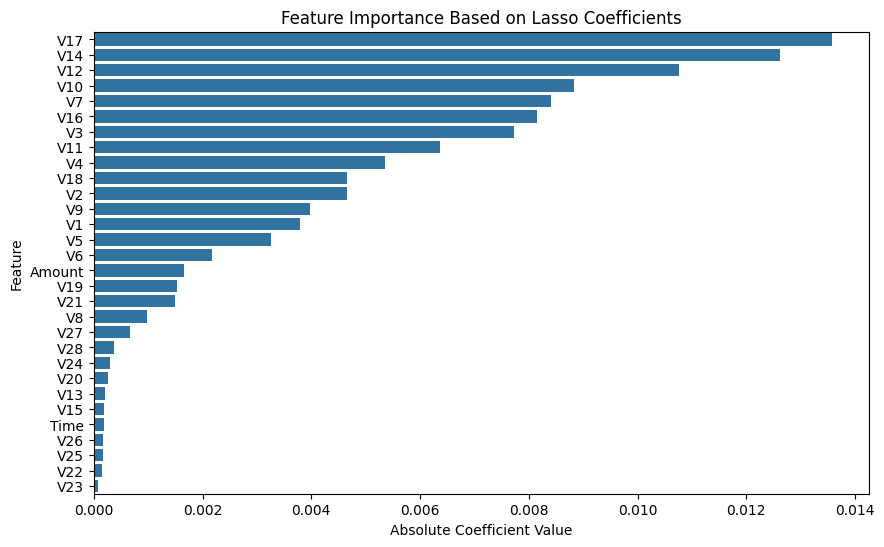

In [ ]:
#Lasso regression(embedded)
from sklearn.linear_model import Lasso
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize your features if necessary
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Lasso model (alpha is the regularization strength)
lasso = Lasso(alpha=0.00001)  # Adjust alpha as needed
lasso.fit(X_scaled, y)

# Get the coefficients
lasso_coef = lasso.coef_

# Create a DataFrame to show feature names and their coefficients
lasso_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_coef})

# Display the features with non-zero coefficients (important features)
selected_features = lasso_df[lasso_df['Coefficient'] != 0]
print(selected_features)
# Sort the features by their absolute coefficient values
lasso_df['Absolute Coefficient'] = np.abs(lasso_df['Coefficient'])
lasso_df = lasso_df.sort_values(by='Absolute Coefficient', ascending=False)

# Plot the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Absolute Coefficient', y='Feature', data=lasso_df)
plt.title('Feature Importance Based on Lasso Coefficients')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Check for imbalance
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [ ]:
#smote
# Handle data imbalance using SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
sm
# Confirming the new class distribution after SMOTE

print(pd.Series(y_res).value_counts())

Class
0    284315
1    284315
Name: count, dtype: int64


In [ ]:
#Split data

# Features
X = df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
        'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
# Target
y = df['Class']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2)

In [ ]:
# Check the size of the split

print("X_res shape:", X_res.shape)

print("X_train size:", X_train.shape) #80%×568,630 (Training samples)
print("X_test size:", X_test.shape)   #20%×568,630 (Testing samples)

X_res shape: (568630, 30)
X_train size: (454904, 30)
X_test size: (113726, 30)


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Load dataset
data = pd.read_csv('creditcard.csv')
X = data.drop('Class', axis=1)
y = data['Class']

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'ANN': MLPClassifier(max_iter=1000)
}

# Define SMOTE and scaling
smote = SMOTE()

# Cross-validate each model with SMOTE and scaling using 5-fold cross-validation
for name, model in models.items():
    pipeline = Pipeline([('smote', smote), ('scaler', StandardScaler()), ('model', model)])
    f1 = cross_val_score(pipeline, X, y, cv=StratifiedKFold(5), scoring=make_scorer(f1_score, average='macro'))
    print(f"{name} F1-score: {f1.mean():.4f} (+/- {f1.std():.4f})")


Logistic Regression F1-score: 0.6236 (+/- 0.0549)
SVM F1-score: 0.7011 (+/- 0.1365)
Decision Tree F1-score: 0.4908 (+/- 0.2199)
Random Forest F1-score: 0.8065 (+/- 0.1870)
KNN F1-score: 0.7428 (+/- 0.0732)
ANN F1-score: 0.7832 (+/- 0.1254)


In [ ]:
#model

#1.svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#: Initialize the SVM model
svm_model = SVC(kernel='rbf', random_state=42)  # other kernels like 'linear', 'poly', etc.

#: Train the model
svm_model.fit(X_train_scaled, y_train)

#: Make predictions
y_pred = svm_model.predict(X_test_scaled)

#: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.9956826055607337
Confusion Matrix:
[[56755   142]
 [  349 56480]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     56897
           1       1.00      0.99      1.00     56829

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [ ]:
#2.KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#: Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)

#: Train the model
knn_model.fit(X_train, y_train)

#: Make predictions
y_pred = knn_model.predict(X_test)

#: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.9708597858009602
Confusion Matrix:
[[54466  2431]
 [  883 55946]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     56897
           1       0.96      0.98      0.97     56829

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726



In [ ]:
#3.logistic
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create an instance of the Logistic Regression model
logistic_model = LogisticRegression()

#: Train the model
logistic_model.fit(X_train, y_train)

#: Make predictions
y_pred = logistic_model.predict(X_test)

#: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9732690853454795
Confusion Matrix:
[[55849  1048]
 [ 1992 54837]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     56897
           1       0.98      0.96      0.97     56829

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726



In [ ]:
#4.random forest
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier()

#: Train the model
rf_model.fit(X_train, y_train)

#: Make predictions
y_pred = rf_model.predict(X_test)

#: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.9998681040395336
Confusion Matrix:
[[56883    14]
 [    1 56828]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56897
           1       1.00      1.00      1.00     56829

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [ ]:
#model
from sklearn.neural_network import MLPClassifier

#5.ANN
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# Initialize
#X,y=make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)
clf=MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)

#: Train the model
clf.fit(X_train, y_train)

#: Make predictions
y_pred = clf.predict(X_test)

#: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.979696815152208
Confusion Matrix:
[[56430   467]
 [ 1842 54987]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56897
           1       0.99      0.97      0.98     56829

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



In [ ]:
#6 Decision tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Initialize
model=DecisionTreeClassifier()
#: Train the model
model.fit(X_train,y_train)

#: Make predictions
y_pred=model.predict(X_test)

#: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print('Confusion Matrix: ')
print(conf_matrix)
print("Classification Report:\n", report)

Accuracy: 0.9984348346024656
Confusion Matrix: 
[[56605   127]
 [   51 56943]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56732
           1       1.00      1.00      1.00     56994

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

